<a href="https://colab.research.google.com/github/timjordanRe/Data_Wrangling_A2/blob/rahuls_branch/109_ass2_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

In [25]:
info = "suburb_info.xlsx"
suburb_info = pd.read_excel(info)

In [26]:
print(suburb_info)

               suburb  number_of_houses  number_of_units   municipality  \
0          ABBOTSFORD              2304             4706          Yarra   
1          ABERFELDIE              1410              453  Moonee Valley   
2           ALBANVALE              1897              138       Brimbank   
3              ALBION              1389             1392       Brimbank   
4          ALPHINGTON              1729             1099        Darebin   
..                ...               ...              ...            ...   
197  WILLIAMS LANDING              2735              173        Wyndham   
198           WINDSOR              2201             4448    Stonnington   
199           WOLLERT              6516              259     Whittlesea   
200         YALLAMBIE              1286               81        Banyule   
201        YARRAVILLE              5855             2072    Maribyrnong   

    aus_born_perc median_income median_house_price  population  
0             68%        $1,797   

In [27]:
suburb_info.describe()

,number_of_houses,number_of_units,population
count,202.000000,202.000000,202.000000
mean,4155.767327,2480.410891,18659.311881
std,3400.864988,3132.684712,9604.187282
min,283.000000,60.000000,170.000000
25%,1973.500000,620.500000,12063.000000
50%,3256.500000,1603.000000,17583.000000
75%,5518.500000,3089.000000,24045.000000
max,23338.000000,24380.000000,54005.000000


In [28]:
print(suburb_info.dtypes)
print(suburb_info.isnull().sum())


suburb                object
number_of_houses       int64
number_of_units        int64
municipality          object
aus_born_perc         object
median_income         object
median_house_price    object
population             int64
dtype: object
suburb                0
number_of_houses      0
number_of_units       0
municipality          0
aus_born_perc         0
median_income         0
median_house_price    0
population            0
dtype: int64


In [29]:
suburb_info['aus_born_perc'] = suburb_info['aus_born_perc'].str.replace('%', '').astype(float)
suburb_info['median_income'] = suburb_info['median_income'].str.replace('$', '').str.replace(',', '').astype(float)
suburb_info['median_house_price'] = suburb_info['median_house_price'].str.replace('$', '').str.replace(',', '').astype(float)
print(suburb_info.dtypes)

suburb                 object
number_of_houses        int64
number_of_units         int64
municipality           object
aus_born_perc         float64
median_income         float64
median_house_price    float64
population              int64
dtype: object


# **Standardization**

In [30]:
suburb_info.describe()

,number_of_houses,number_of_units,aus_born_perc,median_income,median_house_price,population
count,202.000000,202.000000,202.000000,202.000000,2.020000e+02,202.000000
mean,4155.767327,2480.410891,68.366337,1387.935644,1.218817e+06,18659.311881
std,3400.864988,3132.684712,10.761293,317.841321,4.716807e+05,9604.187282
min,283.000000,60.000000,36.000000,633.000000,5.072000e+05,170.000000
25%,1973.500000,620.500000,62.000000,1182.250000,8.706750e+05,12063.000000
50%,3256.500000,1603.000000,70.000000,1393.000000,1.134500e+06,17583.000000
75%,5518.500000,3089.000000,77.000000,1560.000000,1.467550e+06,24045.000000
max,23338.000000,24380.000000,88.000000,2352.000000,2.875800e+06,54005.000000


Since Population, number_of_houses, number_of_units are measured by taking counts, scaling may not be necessary for these columns, and Aus_born_perc is in percentage which is bounded between 0-100 and is dimensionless, scaling is consistent. finally median_income and median_house_price are measured in dollars which is different than the other attributes, scaling could be beneficial

In [31]:
from sklearn import preprocessing

In [32]:
std_scale = preprocessing.StandardScaler().fit(suburb_info[['median_income', 'median_house_price']])
std = std_scale.transform(suburb_info[['median_income', 'median_house_price']])

suburb_info['median_income_scaled'] = std[:,0]
suburb_info['median_house_price_scaled'] = std[:,1]
suburb_info[0:5]

,suburb,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population,median_income_scaled,median_house_price_scaled
0,ABBOTSFORD,2304,4706,Yarra,68.0,1797.0,1299400.0,4025,1.290206,0.171267
1,ABERFELDIE,1410,453,Moonee Valley,81.0,1571.0,1926600.0,22442,0.577392,1.504284
2,ALBANVALE,1897,138,Brimbank,46.0,907.0,594200.0,54005,-1.516891,-1.327527
3,ALBION,1389,1392,Brimbank,52.0,929.0,739100.0,30677,-1.447502,-1.019564
4,ALPHINGTON,1729,1099,Darebin,73.0,1538.0,1729600.0,9227,0.473309,1.085591


In [36]:
print('Mean after standardisation:\median_income_scaled = {:.2f}, median_house_price_scaled = {:.2f}'
      .format(suburb_info['median_income_scaled'].mean(), suburb_info['median_house_price_scaled'].mean()))
print('\nStandard deviation after standardisation:\median_income_scaled = {:.2f}, median_house_price_scaled = {:.2f}'
      .format(suburb_info['median_income_scaled'].std(), suburb_info['median_house_price_scaled'].std()))

Mean after standardisation:\median_income_scaled = -0.00, median_house_price_scaled = -0.00

Standard deviation after standardisation:\median_income_scaled = 1.00, median_house_price_scaled = 1.00


(<Axes: >, <Axes: >)

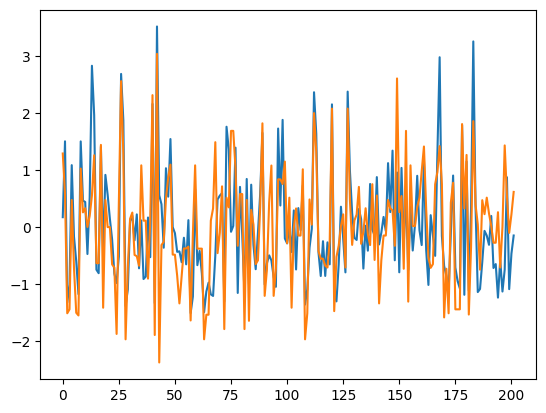

In [41]:
%matplotlib inline
suburb_info['median_house_price_scaled'].plot(),suburb_info['median_income_scaled'].plot()

(<Axes: >, <Axes: >)

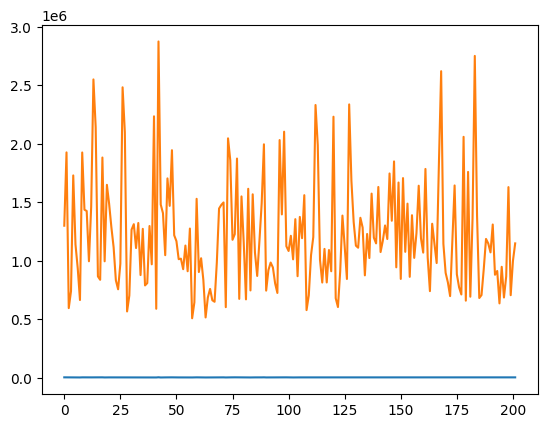

In [43]:
suburb_info['median_income'].plot(), suburb_info['median_house_price'].plot()